# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [36]:
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns

#### 2. Lee una imagen
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

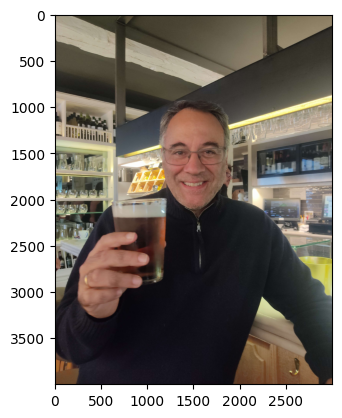

In [39]:
image = imread('img/image.jpg')
plt.imshow(image);

In [40]:
image.shape

(4000, 3000, 3)

Muestra la imagen para ver que se ha cargado bien

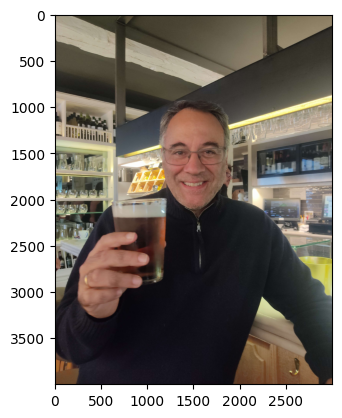

In [41]:
plt.imshow(image);

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [42]:
image_reshaped = image.reshape(-1, 3)

In [44]:
image_reshaped.shape

(12000000, 3)

In [45]:
pd.DataFrame(data = image_reshaped, columns= ['R', 'G', 'B'])

,R,G,B
0,161,150,130
1,161,150,130
2,161,150,130
3,161,150,130
4,161,150,130
...,...,...,...
11999995,133,87,64
11999996,134,88,65
11999997,135,89,66
11999998,135,89,66


#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [46]:
from sklearn.cluster import KMeans

In [90]:
image_reshaped.shape

(12000000, 3)

In [49]:
clustering = KMeans(n_clusters= 5)
clustering.fit(image_reshaped)

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizlos para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [52]:
image_reshaped.shape

(12000000, 3)

In [59]:
clustering.labels_

array([1, 1, 1, ..., 4, 4, 4])

In [68]:
segmented_image = clustering.cluster_centers_[clustering.labels_].round().astype(int)

In [71]:
image.shape

(4000, 3000, 3)

In [72]:
segmented_image_reshaped = segmented_image.reshape(image.shape)

In [74]:
segmented_image_reshaped.shape

(4000, 3000, 3)

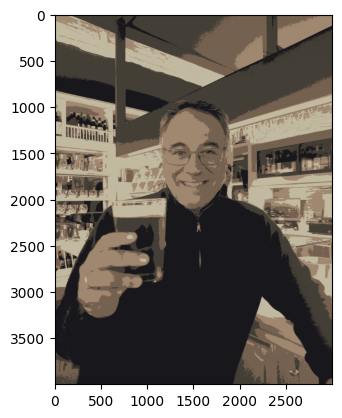

In [76]:
plt.imshow(segmented_image_reshaped);

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

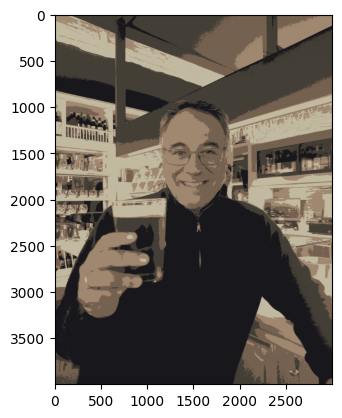

In [77]:
plt.imshow(segmented_image_reshaped);

#### 7. Imprime y guarda en tu ordenador la imagen resultante

In [81]:
image_reshaped.shape

(12000000, 3)

In [84]:
segmented_image_reshaped.shape

(4000, 3000, 3)

In [93]:
segmented_image_reshaped.dtype

dtype('int32')

In [88]:
plt.imsave('img/image_reshaped.jpg', np.array(segmented_image_reshaped, dtype= 'uint8'))

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [109]:
def cluster_images(image_path, n_colors = 5, save = False, filename = 'image', format = 'jpg'):
    image = imread(image_path)
    image_reshaped = image.reshape(-1, image.shape[-1])
    clustering = KMeans(n_clusters= n_colors)
    clustering.fit(image_reshaped)
    segmented_image = clustering.cluster_centers_[clustering.labels_].round().astype(int)
    segmented_image_reshaped = segmented_image.reshape(image.shape)
    plt.imshow(segmented_image_reshaped)

    if save:
        plt.imsave(f'img/{filename}.{format}', np.array(segmented_image_reshaped, dtype= 'uint8'))


c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


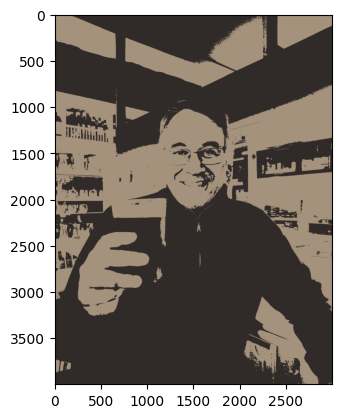

In [110]:
cluster_images('img/image.jpg', n_colors= 2, save= True, filename= 'func_image')

In [ ]:
image_2 = plt.imread('')

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


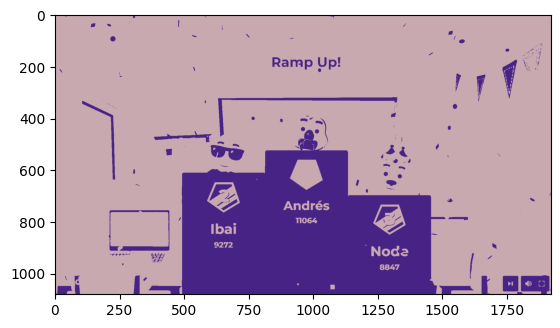

In [101]:
cluster_images('img/image_2.png', n_colors= 2, save= True, filename= 'image_2_2cols', format= 'png')